# Clustering Crypto

In [229]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [230]:
# Load the crypto_data.csv dataset.
df = pd.read_csv('resources/crypto_data.csv',index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [231]:
# Keep all the cryptocurrencies that are being traded.
df_traded =  df[df['IsTrading'] == True]
df_traded.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [232]:
# Keep all the cryptocurrencies that have a working algorithm.
df_traded_algo = df_traded[(df_traded['Algorithm'] != 'N/A') & (df_traded['Algorithm'] != 'Nan')]
df_traded_algo.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [233]:
# Remove the "IsTrading" column. 
df_traded_algo.drop(columns=['IsTrading'], inplace=True)
df_traded_algo.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [234]:
# Remove rows that have at least 1 null value.
df_traded_algo.dropna(inplace=True)
df_traded_algo.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [235]:
# Keep the rows where coins are mined.
crypto_df = df_traded_algo[df_traded_algo['TotalCoinsMined'] > 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [236]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_df_names = crypto_df[['CoinName']].copy()
crypto_df_names.index = crypto_df.index
crypto_df_names.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [237]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(columns=['CoinName'])
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [238]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
# Standardize the data with StandardScaler().
from sklearn.preprocessing import StandardScaler
scaled_sample = StandardScaler().fit_transform(X)
print(scaled_sample[0:1])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [240]:
# Using PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(scaled_sample)
crypto_pca.shape

(532, 3)

In [241]:
# Create a DataFrame with the three principal components.
df_crypto_pca = pd.DataFrame(
    data=crypto_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
    index=X.index
)
df_crypto_pca.head(10)

,principal component 1,principal component 2,principal component 3
42,-0.336872,1.034972,-0.434351
404,-0.320204,1.035403,-0.434568
1337,2.300733,1.750403,-0.464632
BTC,-0.134094,-1.300715,0.143652
ETH,-0.148921,-2.066710,0.242410
LTC,-0.167186,-1.148837,-0.057318
DASH,-0.392074,1.289949,-0.347769
XMR,-0.159740,-2.237173,0.300107
ETC,-0.147363,-2.066780,0.242392
ZEC,-0.143011,-1.996491,0.337343


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

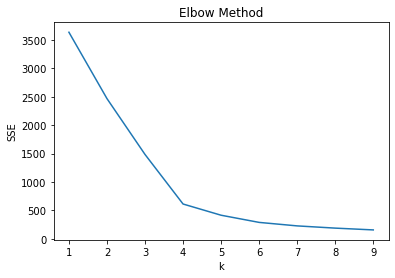

In [242]:
# Create an elbow curve to find the best value for K.
from matplotlib import pyplot as plt
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(df_crypto_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Running K-Means with `k=4`

In [243]:
# Initialize the K-Means model.
df_crypto_model = KMeans(n_clusters=4, random_state=0)

# Fit the model
df_crypto_model.fit(df_crypto_pca)

# Predict clusters
predictions = df_crypto_model.predict(df_crypto_pca)
print(predictions)

[0 0 0 2 2 2 0 2 2 2 0 2 0 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 0 2 0 2 2 0 0 2
 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 2 2 2 0 2 2 0 2 0 0 0 2 2 2 0 0 0 0 0 2
 2 2 0 0 2 0 2 0 0 2 2 2 2 0 0 2 0 2 2 0 0 2 0 0 2 2 0 0 2 0 0 2 0 2 0 2 0
 2 0 0 2 2 0 2 2 2 0 2 2 2 2 2 0 0 2 2 2 0 2 0 2 2 0 2 0 2 0 0 2 2 0 2 2 0
 0 2 0 2 0 0 0 2 2 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2 0 2
 0 0 2 0 2 0 2 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 2 0 2 0 0 2 0 2 2 0 2 2 0 2 0 0 0 2 0 0 2
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 2 2 2 2 0 2 0 0 2 0 2 2 2 0 2 0 2 2 2
 0 2 0 2 0 0 0 2 0 2 2 2 2 2 0 0 2 0 0 0 2 0 2 0 2 0 2 0 0 0 0 2 0 0 2 0 0
 0 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 2 0 2 2 2 0 2 2 0 0 0 2 2 2 0 0 0
 2 2 0 2 2 2 2 0 0 3 2 2 2 0 3 0 0 0 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 2 0 0 2
 0 0 2 2 0 2 0 2 2 2 2 0 0 2 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 2 2 2 2
 0 0 0 0 2 0 0 2 0 0 2 3 2 0 2 2 0 0 2 0 2 2 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0
 2 2 2 0 0 0 2 0 2 0 2 0 

In [244]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, df_crypto_pca], axis=1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = crypto_df_names['CoinName'].values

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
#print(crypto_df.head())
clustered_df.head()

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.336872,1.034972,-0.434351,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320204,1.035403,-0.434568,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.300733,1.750403,-0.464632,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.134094,-1.300715,0.143652,Bitcoin,2
ETH,Ethash,PoW,1.076842e+08,0,-0.148921,-2.066710,0.242410,Ethereum,2


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

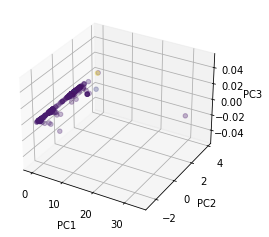

In [245]:
# Creating a 3D-Scatter with the PCA data and the clusters
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the values
ax.scatter(
    clustered_df['principal component 1'], 
    clustered_df['principal component 2'], 
    c=clustered_df['principal component 3'], 
    cmap='viridis', alpha=0.3
    )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [246]:
# Create a table with tradable cryptocurrencies.
tradable = clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 
                                              'TotalCoinsMined', 'Class'], sortable=True, selectable=True)
tradable

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [247]:
# Print the total number of tradable cryptocurrencies.
print(f"There are {clustered_df.shape[0]} tradable cryptocurrencies currently on the market.")


There are 532 tradable cryptocurrencies currently on the market.


In [248]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaled_df = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])
scaled_df

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [249]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data = scaled_df, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class']

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,2
ETH,0.000000e+00,0.000109,Ethereum,2
LTC,8.400000e-05,0.000064,Litecoin,2
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,2
ETC,2.100000e-04,0.000115,Ethereum Classic,2
ZEC,2.100000e-05,0.000007,ZCash,2


In [251]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    hover=['CoinName'],
    by='Class')


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)